In [1]:
#importing required packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv
crime_raw_data = pd.read_csv('data/rpd_crime_2011_to_present.csv')

In [3]:
print("Shape of imported data file {}".format(crime_raw_data.shape))

Shape of imported data file (76228, 40)


In [4]:
#sample data
crime_raw_data.head(2)

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,-77.643682,43.154498,2001,"166 Syke St, Rochester, NY, 14611",166 SYKE ST,2011-00060353,2011,2,1200,2011-02-21T12:00:00.000Z,...,Burglary,Burglary 3rd: Illegal Entry with Intent to Com...,5,Completed,* No Weapon Specified *,Theft from Building,Single Family Home,203.0,Genesee,3.0
1,-77.643582,43.177149,2002,"506 Glenwood Ave, Rochester, NY, 14613",506 GLENWOOD AVE,2013-00070133,2013,3,2130,2013-03-16T21:30:00.000Z,...,Larceny,Petit Larceny ...,6,Completed,* No Weapon Specified *,Theft from Motor Vehicle,Street,241.0,Lake,1.0


In [5]:
#all attributes in the data
crime_raw_data.columns

Index(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category', 'Statute_Text',
       'Statute_Description', 'Statute_CrimeCategory', 'Statute_Attempted',
       'Weapon_Description', 'Larceny_Type', 'Location_Type', 'Geo_Beat',
       'Geo_Section', 'Geo_Section_Num'],
      dtype='object')

In [15]:
#installing folium to enable easy viewing of data on a map
!pip install folium

    100% |████████████████████████████████| 81kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for folium ... - \ | done
  Stored in directory: /Users/ajaykliyara/Library/Caches/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium


In [6]:
#importing folium
#reference : https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/
import folium

In [7]:
crime_type_list = list(crime_raw_data.Statute_Text.unique())
crime_type_list

['Burglary',
 'Larceny',
 'Aggravated Assault',
 'Motor Vehicle Theft',
 'Robbery',
 'Murder',
 'Non-Negligent Manslaughter']

In [8]:
#color palette 
col_palette = sns.color_palette("hls", 8)
col_palette_hex = col_palette.as_hex()
col_palette_hex

['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

In [10]:
ROC_COORDINATES = (43.16, -77.61)

# for speed purposes
MAX_RECORDS = 1000
 
# create empty map zoomed in on Rochester, NY
map = folium.Map(location=ROC_COORDINATES, tiles='Stamen Toner', zoom_start=12)

#start time 
start_time = time.time()

# add a marker for every record in the filtered data, use a clustered view
for each in crime_raw_data[0:MAX_RECORDS].iterrows():
    if(not np.isnan(each[1]['X'])):
        location = [each[1]['Y'],each[1]['X']]
        tooltip = 'city : ' + each[1]['Address_City'] + '\n crime type : ' + each[1]['Statute_Text']
        index = crime_type_list.index(each[1]['Statute_Text'])
        col = col_palette_hex[index]
        folium.CircleMarker(location,
                        radius=2,
                        popup=tooltip,
                        color=col,
                        fill_color=col,
                       ).add_to(map)


print("---Execution Time {} minutes ---".format((time.time() - start_time)/60))
map

---Execution Time 0.5588824033737183 minutes ---


In [11]:
#legend
import branca.colormap as cm
step = cm.StepColormap(
    col_palette_hex,
    vmin=0, vmax=14,
    index=[0, 2, 4, 6, 8, 10, 12]
)

print(crime_type_list)
step



['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [12]:
crime_raw_data.columns

Index(['X', 'Y', 'OBJECTID', 'Geocode_Address', 'Geocode_Street',
       'Case_Number', 'OccurredFrom_Date_Year', 'OccurredFrom_Date_Month',
       'OccurredFrom_Time', 'OccurredFrom_Timestamp',
       'OccurredThrough_Date_Year', 'OccurredThrough_Date_Month',
       'OccurredThrough_Time', 'OccurredThrough_Timestamp',
       'Reported_Date_Year', 'Reported_Date_Month', 'Reported_Time',
       'Reported_Timestamp', 'Address_StreetFull', 'Address_City',
       'Address_State', 'Patrol_Beat', 'Patrol_Section', 'Case_Status',
       'Statute_Title', 'Statute_Section', 'Statute_Subsection',
       'Statute_Degree', 'Statute_Class', 'Statute_Category', 'Statute_Text',
       'Statute_Description', 'Statute_CrimeCategory', 'Statute_Attempted',
       'Weapon_Description', 'Larceny_Type', 'Location_Type', 'Geo_Beat',
       'Geo_Section', 'Geo_Section_Num'],
      dtype='object')

In [13]:
#converting city names to upper
crime_raw_data.loc[:,['Address_City']] = crime_raw_data.Address_City.apply(str.upper)

In [14]:
crime_raw_data.groupby(['Address_City','Statute_Text']).size()

Address_City   Statute_Text              
***            Aggravated Assault               39
               Burglary                        113
               Larceny                         501
               Motor Vehicle Theft              32
               Robbery                          42
AUBURN         Motor Vehicle Theft               1
BATH           Motor Vehicle Theft               1
BRIGHTON       Larceny                           1
               Motor Vehicle Theft               3
BROCKPORT      Motor Vehicle Theft               1
EDISON         Aggravated Assault                1
FAIRPORT       Motor Vehicle Theft               1
GATES          Larceny                           1
               Motor Vehicle Theft               4
GREECE         Aggravated Assault                1
               Motor Vehicle Theft               4
HENRIETTA      Larceny                           1
IRONDEQUOIT    Motor Vehicle Theft               6
MONROE COUNTY  Motor Vehicle Theft      

In [15]:
#only getting rochester data
roc_crime_data = crime_raw_data.loc[crime_raw_data.Address_City=='ROCHESTER',:]
roc_crime_data.shape

(75468, 40)

In [56]:
roc_crime_agg = roc_crime_data.groupby(['Address_City','Statute_Text']).size()
roc_crime_agg

Address_City  Statute_Text              
ROCHESTER     Aggravated Assault             6370
              Burglary                      14931
              Larceny                       44630
              Motor Vehicle Theft            4171
              Murder                          222
              Non-Negligent Manslaughter       12
              Robbery                        5132
dtype: int64

In [63]:
roc_crime_agg.reset_index().columns

Index(['Address_City', 'Statute_Text', 0], dtype='object')

In [73]:
bar_data.sort_values(by=0,ascending=False)

,Address_City,Statute_Text,0
2,ROCHESTER,Larceny,44630
1,ROCHESTER,Burglary,14931
0,ROCHESTER,Aggravated Assault,6370
6,ROCHESTER,Robbery,5132
3,ROCHESTER,Motor Vehicle Theft,4171
4,ROCHESTER,Murder,222
5,ROCHESTER,Non-Negligent Manslaughter,12


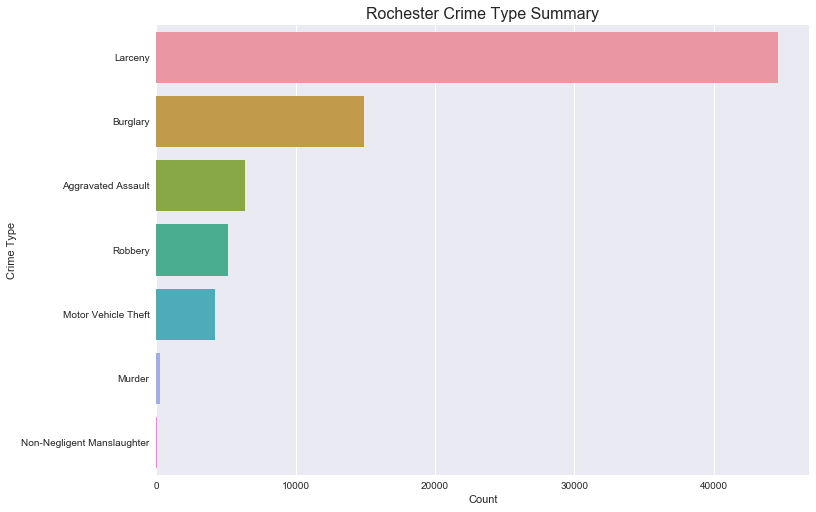

In [79]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
bar_data = roc_crime_agg.reset_index()
bar_data = bar_data.sort_values(by=0,ascending=False)
sns.barplot(y="Statute_Text", x=0, data=bar_data, ax = ax)
ax.set_xlabel('Count')
ax.set_ylabel('Crime Type')
ax.set_title('Rochester Crime Type Summary',size=16)

In [17]:
#unique list of crime of committed in rochester
roc_crime_list = list(roc_crime_data.Statute_Text.unique())
print(roc_crime_list)

['Burglary', 'Larceny', 'Aggravated Assault', 'Motor Vehicle Theft', 'Robbery', 'Murder', 'Non-Negligent Manslaughter']


In [29]:
#magic command to display charts inline
%pylab
%matplotlib inline


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [37]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [51]:
col_palette2 = sns.color_palette("Set2", 10)
col_palette2_hex = col_palette2.as_hex()
col_palette2_hex

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3',
 '#66c2a5',
 '#fc8d62']

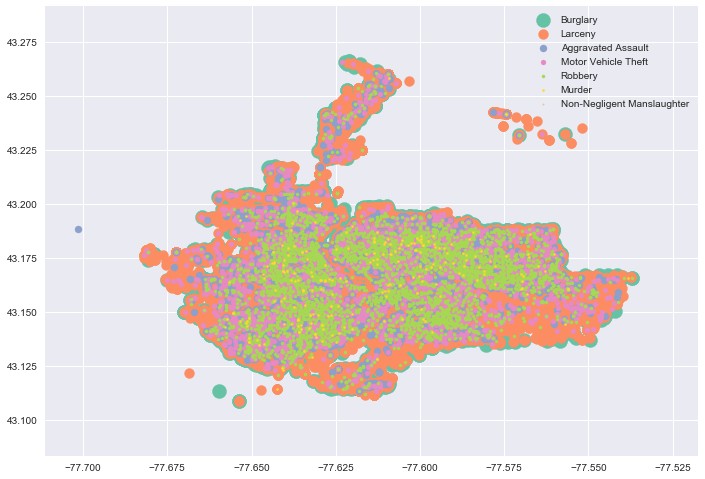

In [52]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
#size = range(140,0,-20)
size = [200,100,50,25,10,5,2]

plt.ion()
#plt.figure()
for crime in roc_crime_list:
    i = roc_crime_list.index(crime)
    temp_crime_data = roc_crime_data.loc[roc_crime_data.Statute_Text==crime,:]
    ax.scatter(temp_crime_data.X, temp_crime_data.Y, color=col_palette2_hex[i],label=crime, s=size[i])
    ax.legend()


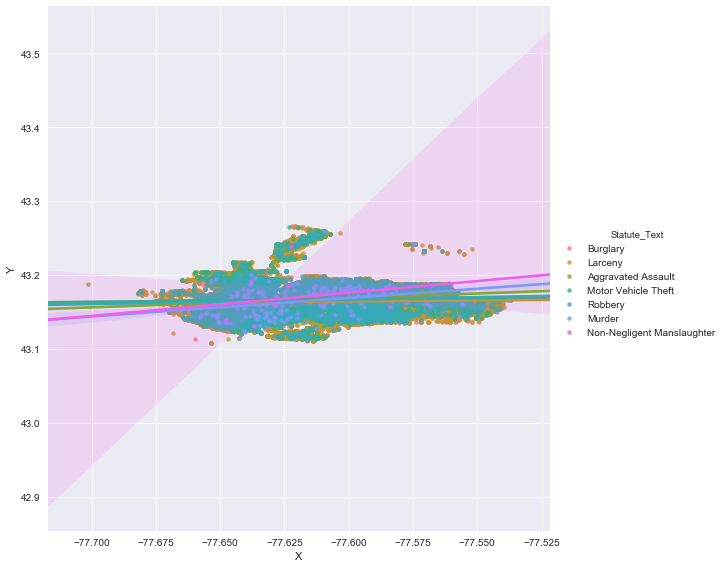

In [55]:
#scatter plot for each type of crime
sns.lmplot(x="X", y="Y", data=roc_crime_data, hue='Statute_Text',size=8,
          scatter_kws={"s": 20})

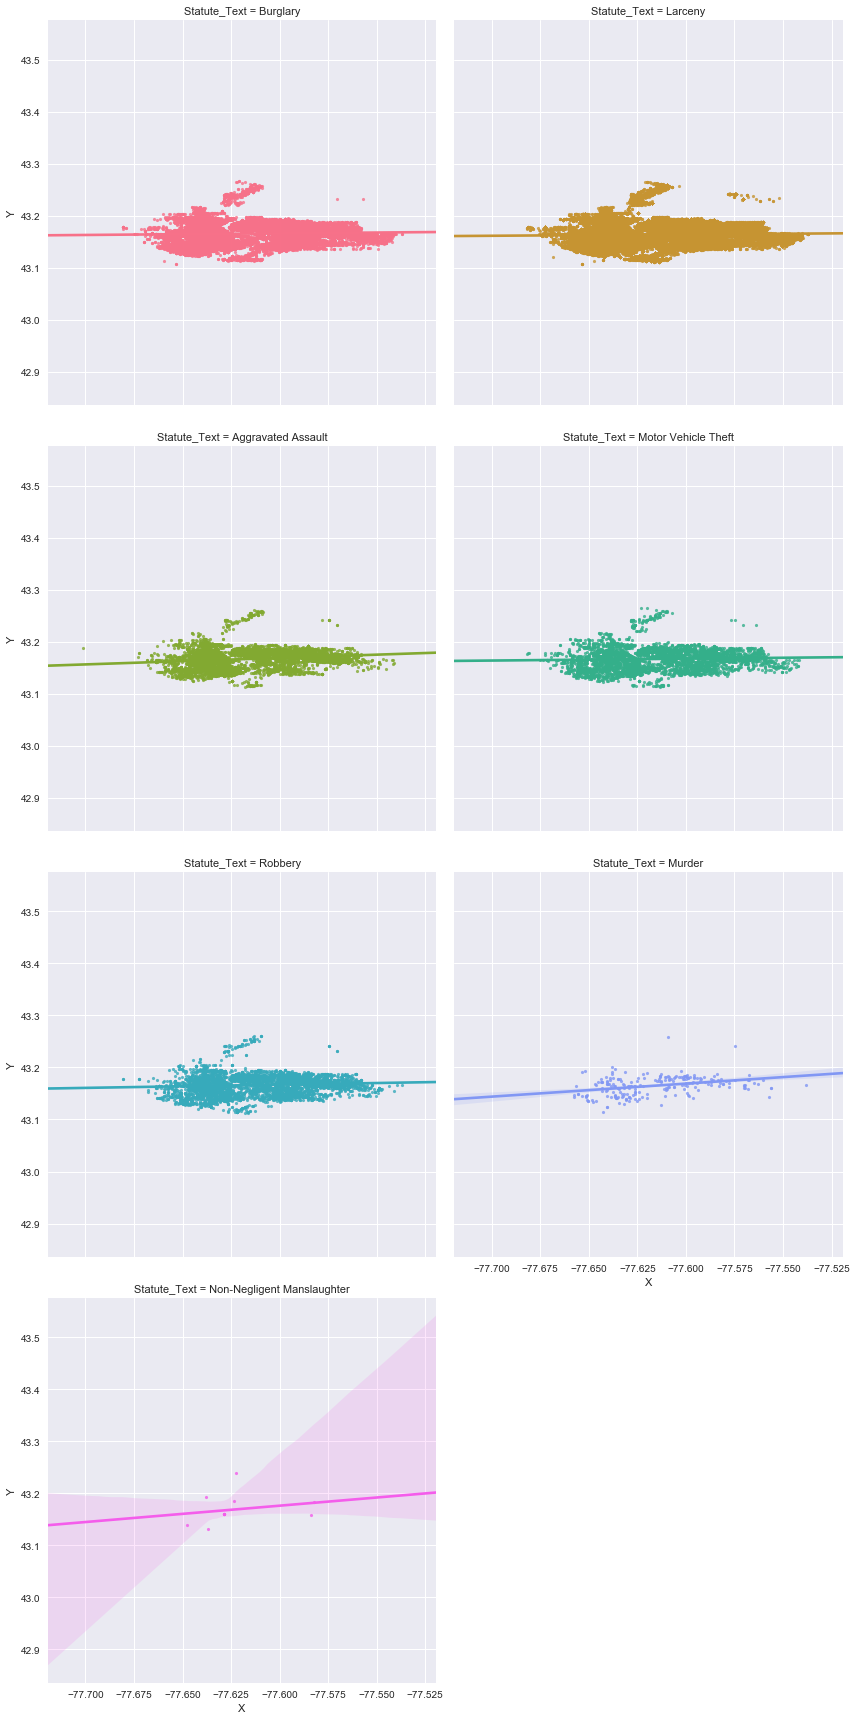

In [142]:
#scatter plot for each type of crime
sns.lmplot(x="X", y="Y", data=roc_crime_data, hue='Statute_Text',col='Statute_Text',size=6, col_wrap=2,
          scatter_kws={"s": 10})